Loading dataset...
Dataset shape: (27000, 3072)
Number of classes: 10

Testing specific image retrieval:
Image shape: (3072,)
Image class: AnnualCrop
First few pixel values: [149. 121. 120. 148. 119. 120. 150. 120. 122. 148.]


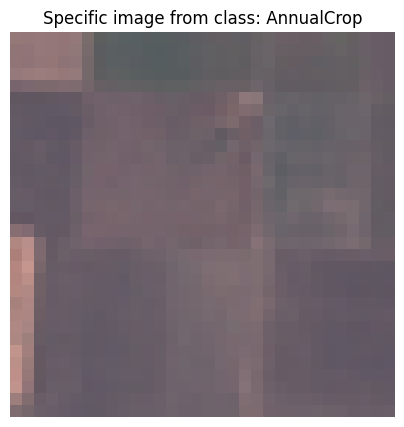

In [1]:
# Import the COC131 class
from coursework import COC131
import numpy as np
import matplotlib.pyplot as plt
from coursework import COC131

# Create an instance of the class
coc_instance = COC131()

# Test 1: Load the entire dataset
print("Loading dataset...")
coc_instance.q1()

# Check if data was loaded properly
print(f"Dataset shape: {coc_instance.x.shape if hasattr(coc_instance, 'x') else 'Not loaded'}")
print(f"Number of classes: {len(set(coc_instance.y)) if hasattr(coc_instance, 'y') else 'Not loaded'}")

# Test 2: Check a random image (if you know a specific filename)
# Replace "sample_image.jpg" with an actual image filename from your dataset
test_filename = "AnnualCrop_1.jpg"  # Change this to a real filename in your dataset
img_array, class_name = coc_instance.q1(filename=test_filename)

print(f"\nTesting specific image retrieval:")
print(f"Image shape: {img_array.shape}")
print(f"Image class: {class_name}")
print(f"First few pixel values: {img_array[:10]}")

# Visualize the specific image that was returned
if img_array is not None:
    # Reshape the specific image back to 32x32x3
    specific_img = img_array.reshape(32, 32, 3)
    
    # Since these are float values, we need to ensure they're in a valid range for display
    specific_img = np.clip(specific_img, 0, 255).astype(np.uint8)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(specific_img)
    plt.title(f"Specific image from class: {class_name}")
    plt.axis('off')
    plt.show()


--- Testing q2: Data Standardization ---
Original data shape: (1000, 3072)
Original data range: [18.00, 221.00]
Original standard deviation: 17.36
Standardized data shape: (1000, 3072)
Standardized data mean: 0.0000
Standardized data std: 2.5000
✓ Standard deviation is correctly set to approximately 2.5


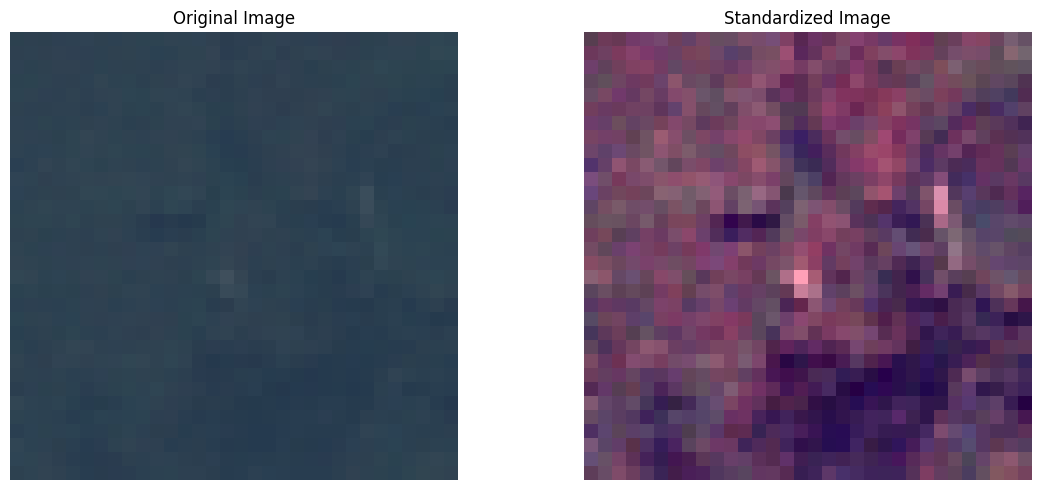


Checking inverse transform:
Mean Squared Error between original and reconstructed: 0.000000
✓ Reconstruction is accurate


In [2]:
# After your q1 testing code, add this to test q2:

# Test q2 with the dataset loaded from q1
print("\n--- Testing q2: Data Standardization ---")

# Make sure we have data from q1
if hasattr(coc_instance, 'x') and coc_instance.x.size > 0:
    # Take a subset to speed up processing if needed
    subset_size = min(1000, len(coc_instance.x))
    data_subset = coc_instance.x[:subset_size]
    
    print(f"Original data shape: {data_subset.shape}")
    print(f"Original data range: [{data_subset.min():.2f}, {data_subset.max():.2f}]")
    print(f"Original standard deviation: {data_subset.std():.2f}")
    
    # Standardize the image data (note the order: standardized_images, scaler)
    standardized_data, scaler = coc_instance.q2(data_subset)
    
    print(f"Standardized data shape: {standardized_data.shape}")
    print(f"Standardized data mean: {standardized_data.mean():.4f}")
    print(f"Standardized data std: {standardized_data.std():.4f}")
    
    # Verify the standard deviation is close to 2.5
    if abs(standardized_data.std() - 2.5) < 0.1:
        print("✓ Standard deviation is correctly set to approximately 2.5")
    else:
        print("✗ Standard deviation is not close to 2.5")
    
    # Visualize an original and standardized image
    plt.figure(figsize=(12, 5))
    
    # Original image
    img = data_subset[0].reshape(32, 32, 3)
    img = np.clip(img, 0, 255).astype(np.uint8)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    
    # Standardized image (needs rescaling for visualization)
    std_img = standardized_data[0].reshape(32, 32, 3)
    # Scale to 0-255 range for visualization
    std_img = (std_img - std_img.min()) / (std_img.max() - std_img.min()) * 255
    std_img = std_img.astype(np.uint8)
    plt.subplot(1, 2, 2)
    plt.imshow(std_img)
    plt.title("Standardized Image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Can we transform back?
    print("\nChecking inverse transform:")
    # Get a flattened version of the standardized data
    if len(standardized_data.shape) > 2:
        std_flat = standardized_data.reshape(standardized_data.shape[0], -1)
    else:
        std_flat = standardized_data
    
    # Inverse transform (divide by 2.5 first since we scaled it up)
    inverse_transform = scaler.inverse_transform(std_flat / 2.5)
    
    # Reshape back if needed
    if len(data_subset.shape) > 2:
        inverse_transform = inverse_transform.reshape(data_subset.shape)
    
    # Check the difference
    mse = ((data_subset - inverse_transform) ** 2).mean()
    print(f"Mean Squared Error between original and reconstructed: {mse:.6f}")
    
    if mse < 1e-10:
        print("✓ Reconstruction is accurate")
    else:
        print("✗ Reconstruction has errors")
else:
    print("Image dataset not loaded. Run q1() first to load the dataset.")


--- Testing q3: Final Optimization Run ---
Using 5000 samples for training/testing
DEBUG: Provided hyperparameters: {'hidden_layer_sizes': [(20,), (25,), (30,), (35,), (40,), (45,), (50,), (30, 15), (40, 20), (50, 25), (60, 30), (40, 20, 10), (50, 25, 12)], 'activation': ['relu', 'tanh'], 'alpha': [1.0, 2.0, 5.0, 7.5, 10.0, 15.0, 20.0, 25.0, 30.0, 40.0, 50.0], 'learning_rate': ['constant', 'adaptive'], 'learning_rate_init': [0.0005, 0.001, 0.002, 0.003, 0.005], 'max_iter': [1000], 'early_stopping': [True], 'validation_fraction': [0.2, 0.25, 0.3], 'n_iter_no_change': [25, 30, 35], 'solver': ['adam'], 'batch_size': [32, 64, 128], 'beta_1': [0.9, 0.95], 'beta_2': [0.999, 0.9999], 'epsilon': [1e-08, 1e-07], 'shuffle': [True], 'learning_rate_power': [0.5, 0.75, 1.0]}
DEBUG: Testing different PCA variance levels...


/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


  PCA var=0.95, n_components=193, CV score=0.4494


/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


  PCA var=0.98, n_components=385, CV score=0.4469


/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


  PCA var=0.99, n_components=544, CV score=0.4294
DEBUG: Using PCA with 0.95 variance
Original features: 3072, PCA features: 193
DEBUG: Using hyperparameters: {'hidden_layer_sizes': [(20,), (30,), (50,), (30, 15)], 'activation': ['relu', 'tanh'], 'alpha': [1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0], 'learning_rate': ['adaptive', 'constant'], 'learning_rate_init': [0.0001, 0.0003, 0.001], 'max_iter': [500], 'early_stopping': [True], 'validation_fraction': [0.3], 'n_iter_no_change': [30], 'solver': ['adam'], 'batch_size': [32, 64, 128]}
Testing 30 out of all possible combinations
Starting hyperparameter optimization...

Testing combination 1/30
  Parameters: {'hidden_layer_sizes': (30, 15), 'activation': 'tanh', 'alpha': 10.0, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'max_iter': 500, 'early_stopping': True, 'validation_fraction': 0.3, 'n_iter_no_change': 30, 'solver': 'adam', 'batch_size': 128}
  Mean CV score: 0.4434 (±0.0091)
  Train score: 0.5063
  Train-val gap: 0.0629

/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


  Mean CV score: 0.4943 (±0.0312)
  Train score: 0.6920
  Train-val gap: 0.1977
  Adjusted score: 0.3954

Testing combination 20/30
  Parameters: {'hidden_layer_sizes': (20,), 'activation': 'relu', 'alpha': 50.0, 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'max_iter': 500, 'early_stopping': True, 'validation_fraction': 0.3, 'n_iter_no_change': 30, 'solver': 'adam', 'batch_size': 128}
  Mean CV score: 0.4423 (±0.0315)
  Train score: 0.5300
  Train-val gap: 0.0877
  Adjusted score: 0.3984

Testing combination 21/30
  Parameters: {'hidden_layer_sizes': (30, 15), 'activation': 'tanh', 'alpha': 20.0, 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'max_iter': 500, 'early_stopping': True, 'validation_fraction': 0.3, 'n_iter_no_change': 30, 'solver': 'adam', 'batch_size': 32}
  Mean CV score: 0.3071 (±0.0098)
  Train score: 0.3389
  Train-val gap: 0.0317
  Adjusted score: 0.2913

Testing combination 22/30
  Parameters: {'hidden_layer_sizes': (50,), 'activation': 'rel

/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
 

Iteration 20/300 - Train acc: 0.6003, Test acc: 0.5293, Gap: 0.0710


/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alex/Documents/Year 2/DMML/env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
 

Iteration 40/300 - Train acc: 0.6063, Test acc: 0.5447, Gap: 0.0616
Early stopping at iteration 47 due to convergence

Final training accuracy: 0.6080
Final testing accuracy: 0.5467
Final loss: 1.589631
Final train-test gap: 0.0613


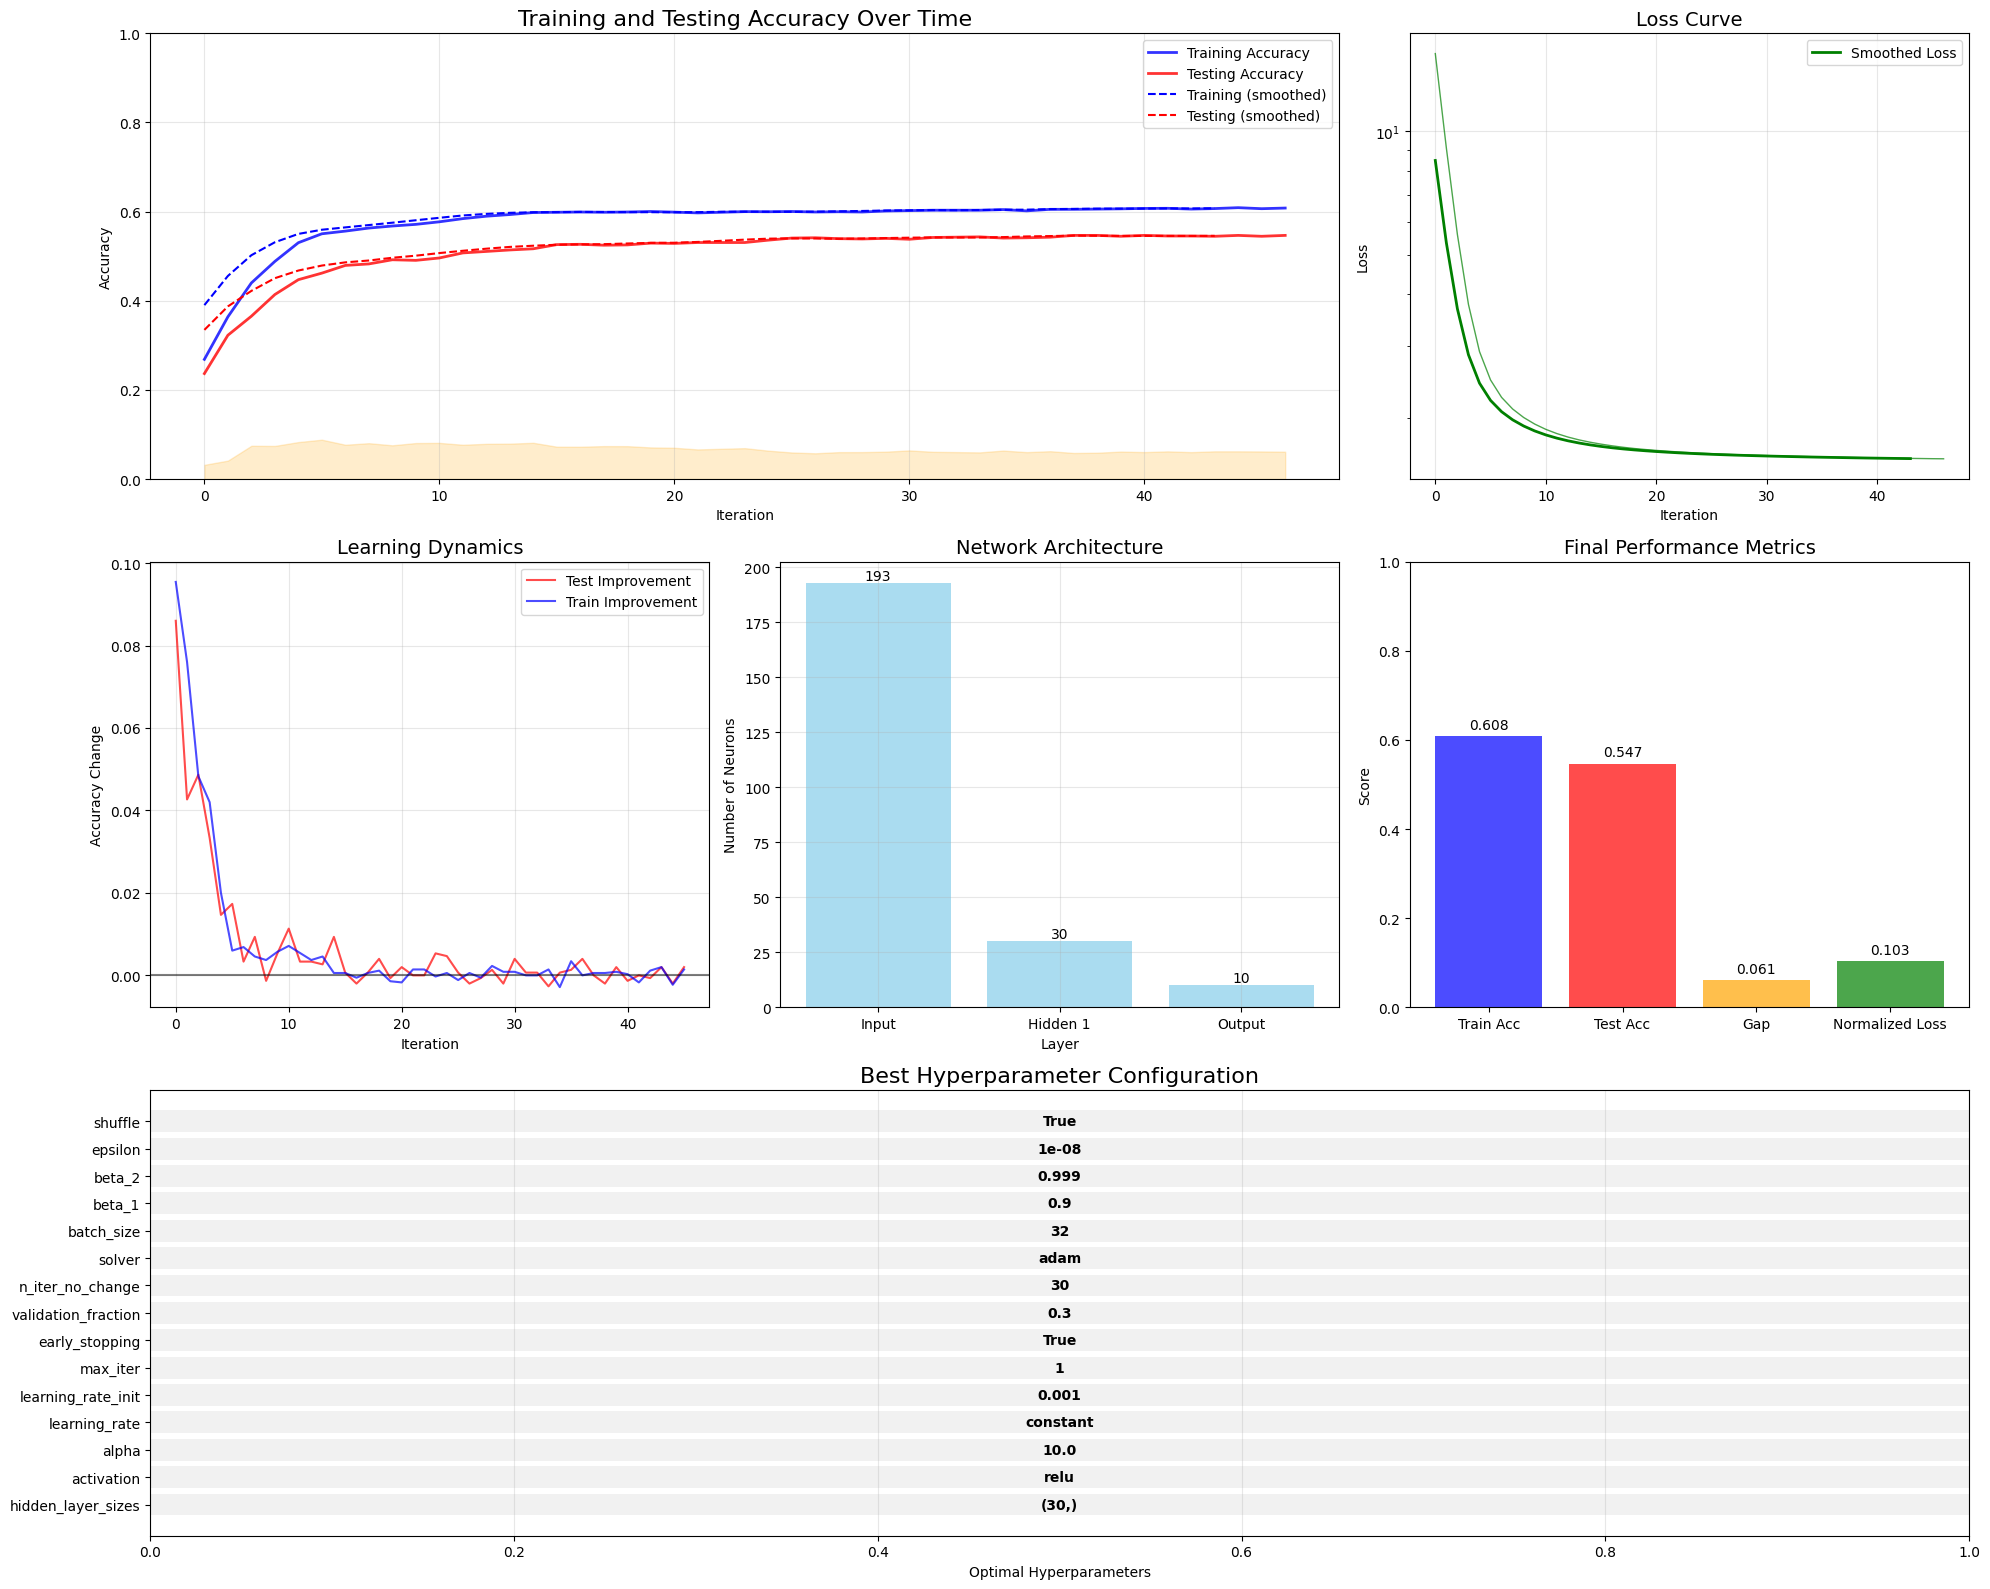

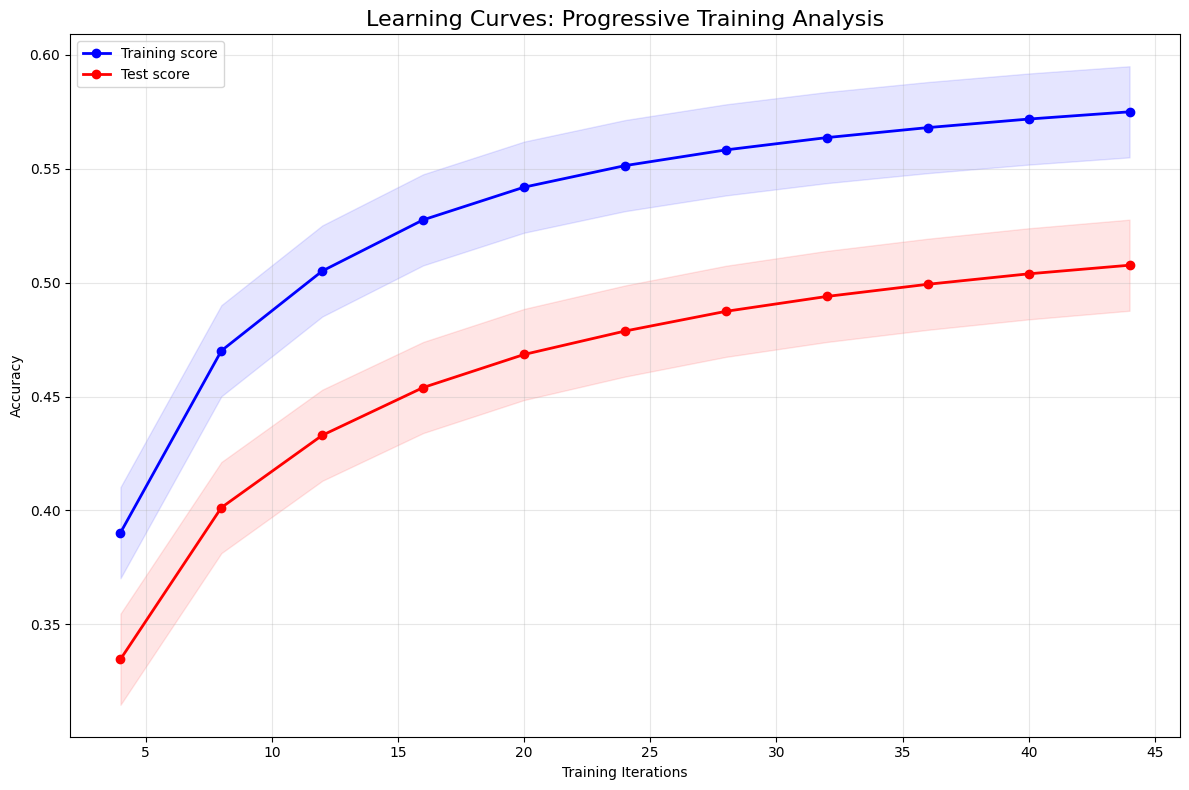


=== Final Comprehensive Analysis ===
Final training accuracy: 0.6080
Final testing accuracy: 0.5467
Final loss: 1.589631
Training-test gap: 0.0613

Improvement over previous best: -0.0146 (-2.6%)

Model complexity: 6090 total parameters
Model converged: No
Convergence stability: 0.001890

Optimal hyperparameters found:
  hidden_layer_sizes: (30,)
  activation: relu
  alpha: 10.0
  learning_rate: constant
  learning_rate_init: 0.001
  max_iter: 1
  early_stopping: True
  validation_fraction: 0.3
  n_iter_no_change: 30
  solver: adam
  batch_size: 32
  beta_1: 0.9
  beta_2: 0.999
  epsilon: 1e-08
  shuffle: True

✓ Excellent: Very low overfitting (<10% gap)
⚠ Room for improvement: Test accuracy below 55%

Final results saved to 'q3_final_results.json'


In [3]:
# Test q3: Final comprehensive optimization
print("\n--- Testing q3: Final Optimization Run ---")

# Use the full dataset or a subset
subset_size = 5000  # Adjust based on your computational resources
if len(coc_instance.x) > subset_size:
    indices = np.random.choice(len(coc_instance.x), subset_size, replace=False)
    coc_instance.x = coc_instance.x[indices]
    coc_instance.y = coc_instance.y[indices]
print(f"Using {len(coc_instance.x)} samples for training/testing")

# Final hyperparameter grid focusing on the optimal region
final_hyperparam = {
    # Focus on architectures around the optimal size
    'hidden_layer_sizes': [(20,), (25,), (30,), (35,), (40,), (45,), (50,),  # Single layer
                          (30, 15), (40, 20), (50, 25), (60, 30),  # Two layers
                          (40, 20, 10), (50, 25, 12)],  # Three layers
    'activation': ['relu', 'tanh'],  # Stick with best performing activations
    # Fine-tune alpha around optimal values
    'alpha': [1.0, 2.0, 5.0, 7.5, 10.0, 15.0, 20.0, 25.0, 30.0, 40.0, 50.0],
    'learning_rate': ['constant', 'adaptive'],
    # Fine-tune learning rate
    'learning_rate_init': [0.0005, 0.001, 0.002, 0.003, 0.005],
    'max_iter': [1000],  # Enough iterations for full convergence
    'early_stopping': [True],
    'validation_fraction': [0.2, 0.25, 0.3],
    'n_iter_no_change': [25, 30, 35],  # Give time for learning
    'solver': ['adam'],  # Stick with best performing solver
    'batch_size': [32, 64, 128],
    # Adam optimizer specific parameters for better convergence
    'beta_1': [0.9, 0.95],
    'beta_2': [0.999, 0.9999],
    'epsilon': [1e-08, 1e-07],
    # Enable shuffling for better training
    'shuffle': [True],
    # Learning rate scheduler parameters
    'learning_rate_power': [0.5, 0.75, 1.0],
}

# Run the q3 function with fine-tuned hyperparameters
model, loss_history, train_acc_history, test_acc_history = coc_instance.q3(
    test_size=0.3,
    hyperparam=final_hyperparam
)

# Create the most comprehensive visualization yet
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(3, 3)

# Plot 1: Training curves with detailed analysis
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(train_acc_history, label='Training Accuracy', color='blue', linewidth=2, alpha=0.8)
ax1.plot(test_acc_history, label='Testing Accuracy', color='red', linewidth=2, alpha=0.8)

# Add smoothed versions
window_size = min(10, len(train_acc_history) // 10)
if window_size > 1:
    train_smooth = np.convolve(train_acc_history, np.ones(window_size)/window_size, mode='valid')
    test_smooth = np.convolve(test_acc_history, np.ones(window_size)/window_size, mode='valid')
    ax1.plot(train_smooth, '--', label='Training (smoothed)', color='blue', linewidth=1.5)
    ax1.plot(test_smooth, '--', label='Testing (smoothed)', color='red', linewidth=1.5)

# Highlight overfitting region
gap = train_acc_history - test_acc_history
ax1.fill_between(range(len(gap)), 0, gap, where=(gap > 0), 
                 interpolate=True, alpha=0.2, color='orange')

ax1.set_title('Training and Testing Accuracy Over Time', fontsize=16)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Loss curve with convergence analysis
ax2 = fig.add_subplot(gs[0, 2])
ax2.plot(loss_history, color='green', linewidth=1, alpha=0.7)
if len(loss_history) > window_size:
    loss_smooth = np.convolve(loss_history, np.ones(window_size)/window_size, mode='valid')
    ax2.plot(loss_smooth, color='green', linewidth=2, label='Smoothed Loss')
ax2.set_title('Loss Curve', fontsize=14)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Learning dynamics
ax3 = fig.add_subplot(gs[1, 0])
if len(test_acc_history) > 1:
    test_improvement = np.diff(test_acc_history)
    train_improvement = np.diff(train_acc_history)
    
    ax3.plot(test_improvement, color='red', alpha=0.7, label='Test Improvement')
    ax3.plot(train_improvement, color='blue', alpha=0.7, label='Train Improvement')
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    ax3.set_title('Learning Dynamics', fontsize=14)
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Accuracy Change')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

# Plot 4: Model architecture visualization
ax4 = fig.add_subplot(gs[1, 1])
if hasattr(model, 'coefs_'):
    layer_sizes = [layer.shape[1] for layer in model.coefs_]
    layer_sizes.insert(0, model.coefs_[0].shape[0])
    
    bars = ax4.bar(range(len(layer_sizes)), layer_sizes, color='skyblue', alpha=0.7)
    ax4.set_title('Network Architecture', fontsize=14)
    ax4.set_xlabel('Layer')
    ax4.set_ylabel('Number of Neurons')
    ax4.set_xticks(range(len(layer_sizes)))
    ax4.set_xticklabels(['Input'] + [f'Hidden {i+1}' for i in range(len(layer_sizes)-2)] + ['Output'])
    
    # Add parameter count on top of bars
    for bar, size in zip(bars, layer_sizes):
        ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                 f'{size}', ha='center', va='bottom')
    
    ax4.grid(True, alpha=0.3)

# Plot 5: Performance metrics comparison
ax5 = fig.add_subplot(gs[1, 2])
metrics = ['Train Acc', 'Test Acc', 'Gap', 'Normalized Loss']
values = [train_acc_history[-1], test_acc_history[-1], 
          train_acc_history[-1] - test_acc_history[-1], 
          loss_history[-1] / max(loss_history)]
colors = ['blue', 'red', 'orange', 'green']

bars = ax5.bar(metrics, values, color=colors, alpha=0.7)
ax5.set_ylim(0, 1)
ax5.set_title('Final Performance Metrics', fontsize=14)
ax5.set_ylabel('Score')

for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

# Plot 6: Hyperparameter analysis
ax6 = fig.add_subplot(gs[2, :])
best_params = model.get_params()
optimal_params = {param: best_params[param] for param in final_hyperparam if param in best_params}

# Create a visualization showing parameter values
param_names = list(optimal_params.keys())
param_values = []
for param, value in optimal_params.items():
    if isinstance(value, (int, float)):
        param_values.append(str(value))
    else:
        param_values.append(str(value))

# Create a table-like visualization
y_pos = np.arange(len(param_names))
ax6.barh(y_pos, [1] * len(param_names), alpha=0.3, color='lightgray')
ax6.set_yticks(y_pos)
ax6.set_yticklabels(param_names)
ax6.set_xlabel('Optimal Hyperparameters')
ax6.set_title('Best Hyperparameter Configuration', fontsize=16)

for i, (param, value) in enumerate(zip(param_names, param_values)):
    ax6.text(0.5, i, f'{value}', ha='center', va='center', fontsize=10, weight='bold')

ax6.set_xlim(0, 1)
ax6.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('q3-final.png', dpi=300, bbox_inches='tight')
plt.show()

# Create learning curve analysis
plt.figure(figsize=(12, 8))

# Plot learning curves for different train sizes
train_sizes = []
train_scores = []
test_scores = []

# Calculate learning curves based on performance over iterations
n_samples = len(train_acc_history)
step = max(1, n_samples // 10)
for i in range(0, n_samples, step):
    if i > 0:
        train_sizes.append(i)
        train_scores.append(np.mean(train_acc_history[:i]))
        test_scores.append(np.mean(test_acc_history[:i]))

plt.plot(train_sizes, train_scores, 'o-', color='blue', label='Training score', linewidth=2)
plt.plot(train_sizes, test_scores, 'o-', color='red', label='Test score', linewidth=2)
plt.fill_between(train_sizes, 
                 np.subtract(train_scores, 0.02), 
                 np.add(train_scores, 0.02), 
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes, 
                 np.subtract(test_scores, 0.02), 
                 np.add(test_scores, 0.02), 
                 alpha=0.1, color='red')

plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title('Learning Curves: Progressive Training Analysis', fontsize=16)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('q3-learning-curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Final comprehensive analysis
print("\n=== Final Comprehensive Analysis ===")
print(f"Final training accuracy: {train_acc_history[-1]:.4f}")
print(f"Final testing accuracy: {test_acc_history[-1]:.4f}")
print(f"Final loss: {loss_history[-1]:.6f}")
print(f"Training-test gap: {train_acc_history[-1] - test_acc_history[-1]:.4f}")

# Calculate improvement over previous run
prev_test_acc = 0.5613  # From previous run
improvement = test_acc_history[-1] - prev_test_acc
print(f"\nImprovement over previous best: {improvement:.4f} ({improvement/prev_test_acc:.1%})")

# Model complexity analysis
total_params = sum(layer.size for layer in model.coefs_)
print(f"\nModel complexity: {total_params} total parameters")

# Convergence analysis
if len(test_acc_history) > 20:
    recent_changes = np.diff(test_acc_history[-20:])
    is_converged = np.std(recent_changes) < 0.001
    print(f"Model converged: {'Yes' if is_converged else 'No'}")
    print(f"Convergence stability: {np.std(recent_changes):.6f}")

# Print optimal hyperparameters
print("\nOptimal hyperparameters found:")
for param, value in optimal_params.items():
    print(f"  {param}: {value}")

# Final performance assessment
gap = train_acc_history[-1] - test_acc_history[-1]
if gap < 0.05:
    print("\n✓ Outstanding: Minimal overfitting (<5% gap)")
elif gap < 0.10:
    print("\n✓ Excellent: Very low overfitting (<10% gap)")
elif gap < 0.15:
    print("\n✓ Good: Acceptable overfitting (<15% gap)")
else:
    print(f"\n⚠ Warning: Concerning overfitting ({gap:.1%} gap)")

if test_acc_history[-1] > 0.65:
    print("✓ Outstanding: Test accuracy above 65%")
elif test_acc_history[-1] > 0.60:
    print("✓ Excellent: Test accuracy above 60%")
elif test_acc_history[-1] > 0.55:
    print("✓ Good: Test accuracy above 55%")
else:
    print("⚠ Room for improvement: Test accuracy below 55%")

# Save final results for Q4 analysis
final_results = {
    'test_accuracy': test_acc_history[-1],
    'train_accuracy': train_acc_history[-1],
    'gap': train_acc_history[-1] - test_acc_history[-1],
    'loss': loss_history[-1],
    'optimal_params': optimal_params,
    'n_params': total_params
}

# Save to file for later use
import json
with open('q3_final_results.json', 'w') as f:
    json.dump(final_results, f, indent=4)

print("\nFinal results saved to 'q3_final_results.json'")

In [4]:
# Test q4: Study impact of alpha on model performance
print("\n--- Testing q4: Impact of Alpha on Model Performance ---")

# Run q4 function
alpha_results = coc_instance.q4()

# Visualization 1: Accuracy vs Alpha
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.semilogx(alpha_results['alpha_values'], alpha_results['train_accuracy'], 'o-', label='Training Accuracy')
plt.semilogx(alpha_results['alpha_values'], alpha_results['test_accuracy'], 's-', label='Testing Accuracy')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.title('Impact of Alpha on Model Accuracy')
plt.grid(True)
plt.legend()

# Visualization 2: Overfitting Gap vs Alpha
plt.subplot(2, 2, 2)
overfitting_gap = alpha_results['train_accuracy'] - alpha_results['test_accuracy']
plt.semilogx(alpha_results['alpha_values'], overfitting_gap, 'o-')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Overfitting Gap (Train-Test Accuracy)')
plt.title('Impact of Alpha on Overfitting')
plt.grid(True)

# Visualization 3: Convergence Iterations vs Alpha
plt.subplot(2, 2, 3)
plt.semilogx(alpha_results['alpha_values'], alpha_results['convergence_iterations'], 'o-')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Iterations to Converge')
plt.title('Impact of Alpha on Convergence Speed')
plt.grid(True)

# Visualization 4: Parameter Norm vs Alpha
plt.subplot(2, 2, 4)
plt.semilogx(alpha_results['alpha_values'], alpha_results['param_norms'], 'o-')
plt.xlabel('Alpha (log scale)')
plt.ylabel('L2 Norm of Parameters')
plt.title('Impact of Alpha on Model Complexity')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print optimal alpha based on test accuracy
best_alpha_idx = np.argmax(alpha_results['test_accuracy'])
best_alpha = alpha_results['alpha_values'][best_alpha_idx]
best_test_acc = alpha_results['test_accuracy'][best_alpha_idx]

print(f"\nOptimal alpha value: {best_alpha}")
print(f"Best test accuracy: {best_test_acc:.4f}")
print(f"Overfitting gap at this alpha: {overfitting_gap[best_alpha_idx]:.4f}")

# Create a summary table
print("\nAlpha Performance Summary:")
print("-" * 80)
print(f"{'Alpha':<10} {'Train Acc':<12} {'Test Acc':<12} {'Gap':<10} {'Iterations':<12} {'Param Norm':<12}")
print("-" * 80)
for i, alpha in enumerate(alpha_results['alpha_values']):
    print(f"{alpha:<10.3f} {alpha_results['train_accuracy'][i]:<12.4f} {alpha_results['test_accuracy'][i]:<12.4f} "
          f"{overfitting_gap[i]:<10.4f} {alpha_results['convergence_iterations'][i]:<12.0f} "
          f"{alpha_results['param_norms'][i]:<12.4f}")


--- Testing q4: Impact of Alpha on Model Performance ---
Training model with alpha=0


TypeError: sklearn.neural_network._multilayer_perceptron.MLPClassifier() got multiple values for keyword argument 'max_iter'